<a href="https://colab.research.google.com/github/LilySu/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/LS_DS_242_Validate_classification_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Model Validation_ 

# Classification Metrics & Imbalanced Classes

#### Objectives
- Classification Metrics: Accuracy, Precision, Recall, F1, ROC AUC
- Confusion Matrix
- Imbalanced Classes

#### Pre-reads
- [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)


## Preliminary setup

#### Install [category_encoders](https://github.com/scikit-learn-contrib/categorical-encoding)
- Google Colab: `pip install category_encoders`
- Local, Anaconda: `conda install -c conda-forge category_encoders`

#### Install  [mlxtend](http://rasbt.github.io/mlxtend/) to plot decision regions
- Google Colab: Already installed
- Local, Anaconda: `conda install -c conda-forge mlxtend`

#### Get the Bank Marketing dataset
- Download from [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- Or run this cell:

In [0]:
# pip install category_encoders

# Classification Metrics & Confusion Matrix — with Bank Marketing dataset

In [0]:
import requests, zipfile, io
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


In [0]:
#    # bank client data:
#    1 - age (numeric)
#    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
#                                        "blue-collar","self-employed","retired","technician","services") 
#    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#    4 - education (categorical: "unknown","secondary","primary","tertiary")
#    5 - default: has credit in default? (binary: "yes","no")
#    6 - balance: average yearly balance, in euros (numeric) 
#    7 - housing: has housing loan? (binary: "yes","no")
#    8 - loan: has personal loan? (binary: "yes","no")
#    # related with the last contact of the current campaign:
#    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
#   10 - day: last contact day of the month (numeric)
#   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
#   12 - duration: last contact duration, in seconds (numeric)
#    # other attributes:
#   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#   15 - previous: number of contacts performed before this campaign and for this client (numeric)
#   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#   Output variable (desired target):
#   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [0]:
# This code comes from our previous notebook

# Imports
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load data
bank = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Assign to X, y
X = bank.drop(columns='y')
y = bank['y'] == 'yes'

# Drop leaky feature
X = X.drop(columns='duration')

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)#only makes sense for categorical variables, using class labels, only for classification, not regression

# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

#### scikit-learn documentation
- [sklearn.linear_model.LogisticRegression.predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)
- [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [sklearn.model_selection.cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)

In [0]:
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=-1, 
                                 method='predict_proba')[:,1]
#we want to generate predictions for cross validation
#for each datapoint
#when we generated predictive probabilities

#### Change the threshold and re-run this cell

In [163]:
threshold = 0.5#% confidence people will sign up
#how many positive predictions we want
y_pred = y_pred_proba >= threshold
correct = y_pred == y_train

labels = pd.DataFrame({'Ground Truth': y_train, 
                       'Predicted Probability': y_pred_proba, 
                       'Discrete Prediction': y_pred, 
                       'Correct Prediction?': correct})

labels.head(20)
#we look at the first 20 predictions that we make

,Ground Truth,Predicted Probability,Discrete Prediction,Correct Prediction?
25611,False,0.047259,False,True
26010,False,0.025392,False,True
40194,True,0.600246,True,True
297,False,0.031742,False,True
36344,False,0.440106,False,True
21806,False,0.065051,False,True
37395,True,0.225595,False,False
25863,False,0.065761,False,True
7393,False,0.026482,False,True
14697,False,0.069068,False,True


In [164]:
threshold = 0.5#% confidence people will sign up
y_pred = y_pred_proba >= threshold
correct = y_pred == y_train

labels = pd.DataFrame({'Ground Truth': y_train, 
                       'Predicted Probability': y_pred_proba, 
                       'Discrete Prediction': y_pred, 
                       'Correct Prediction?': correct})

labels.loc[8]

Ground Truth                 False
Predicted Probability    0.0372022
Discrete Prediction          False
Correct Prediction?           True
Name: 8, dtype: object

#### Change the threshold and re-run this cell

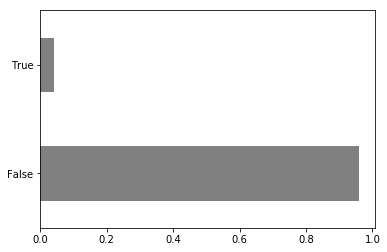

In [165]:
labels['Discrete Prediction'].value_counts(normalize=True).plot.barh(color='grey');

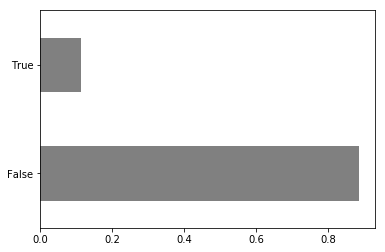

In [166]:
labels['Ground Truth'].value_counts(normalize=True).plot.barh(color='grey');

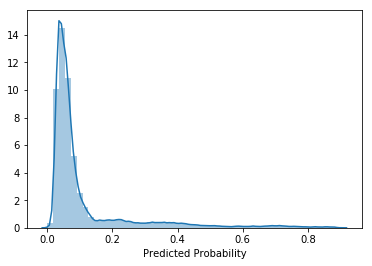

In [167]:
import seaborn as sns
sns.distplot(labels['Predicted Probability']);

In [168]:
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.1
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred))

pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
#make a dataframe out of the output
#where our models is confused
# model is not confused at actual negative, predicted negative
#actual positive and predicted positive are also correct
#the opposite diagonal is where the model is confused
#wasted time or money in actual negative and predicted positive - false positives
# missed opportunities in actual positive and predicted negative - false negatives

# 31% make the sale, we are reaching 65% of the people who are willing to sign up
#in entire dataset, we're calling 2418 people

              precision    recall  f1-score   support

       False       0.95      0.82      0.88     29238
        True       0.31      0.65      0.42      3712

   micro avg       0.80      0.80      0.80     32950
   macro avg       0.63      0.74      0.65     32950
weighted avg       0.88      0.80      0.83     32950



,Predicted Negative,Predicted Positive
Actual Negative,23971,5267
Actual Positive,1294,2418


In [169]:
#how these metrics are gamable, threshold high: very few positive predictions, so precision is good, but recall is terrible
threshold = 0.9
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred))

pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

              precision    recall  f1-score   support

       False       0.89      1.00      0.94     29238
        True       1.00      0.00      0.00      3712

   micro avg       0.89      0.89      0.89     32950
   macro avg       0.94      0.50      0.47     32950
weighted avg       0.90      0.89      0.83     32950



,Predicted Negative,Predicted Positive
Actual Negative,29238,0
Actual Positive,3710,2


In [170]:
threshold = 0.05
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred))

pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
#this could be a lot better than calling people at random

              precision    recall  f1-score   support

       False       0.96      0.43      0.59     29238
        True       0.16      0.86      0.27      3712

   micro avg       0.47      0.47      0.47     32950
   macro avg       0.56      0.64      0.43     32950
weighted avg       0.87      0.47      0.55     32950



,Predicted Negative,Predicted Positive
Actual Negative,12428,16810
Actual Positive,515,3197


In [171]:
threshold = 0.005
y_pred = y_pred_proba >= threshold

print(classification_report(y_train, y_pred))

pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
#calling everybody except 184 people

              precision    recall  f1-score   support

       False       0.77      0.00      0.00     29238
        True       0.11      1.00      0.20      3712

   micro avg       0.11      0.11      0.11     32950
   macro avg       0.44      0.50      0.10     32950
weighted avg       0.70      0.11      0.02     32950



,Predicted Negative,Predicted Positive
Actual Negative,10,29228
Actual Positive,3,3709


In [172]:
(140 + 32) / (140 + 32 + 617 + 515)

0.13190184049079753

In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.1128679817905918

In [174]:
#TODO 

true_negative  = 23971 #actual negative, predicted negative
false_positive = 5267 #actual negative, predicted positive
false_negative = 1294 #actual positive, predicted negative
true_positive  = 2418 #actual positive, predicted positive

actual_negative = 28766 + 452
actual_positive =1294 + 2418

predicted_negative = 23971 + 1294
predicted_positive = 5267 + 2418

accuracy = (true_positive + true_negative) / (predicted_negative + predicted_positive)
#correct predictions / total predictions % , (true positives + true negatives)/(sum of all 4 numbers) 
precision = true_positive / predicted_positive
#precision and recall are based on relevance
#precision, based on how many selected, which are relevant?
#any search result on google - precision - search with eral scruggs / total search results
recall = true_positive / actual_positive
#recall, based on how many relevant, how many are selected?
#what was your recall for the most relevant things?
#of all the people who would sign up, how many did you actually select to call?
f1 = 2*precision * recall / (precision+recall)
print('Accuracy:',accuracy,'Precision:', precision, 'Recall:', recall,'F1', f1)

Accuracy: 0.8008801213960546 Precision: 0.3146389069616135 Recall: 0.6514008620689655 F1 0.42432219005001315


#### F1 Score
"[The F1 score](https://en.wikipedia.org/wiki/F1_score) is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0."

In [0]:
#(2 * precision * recall)/precision + recall
#if you can assign dollars that align with cost or benefit, if not a budget
#a real world problem that translates to a quantitative problem, then translate back to real world solution

### ROC AUC (Receiver Operating Characteristic, Area Under the Curve)

#### Scikit-Learn docs
- [User Guide: Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

#### More links
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings."

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures how well a classifier ranks predicted probabilities. It ranges from 0 to 1. A naive majority class baseline will have an ROC AUC score of 0.5. 

In [0]:
#true positive rate = precision
#false positive rate = recall
#roc curve represents the different kinds of tradeoffs you can make

Area under the Receiver Operating Characteristic curve: 0.7885656855096462


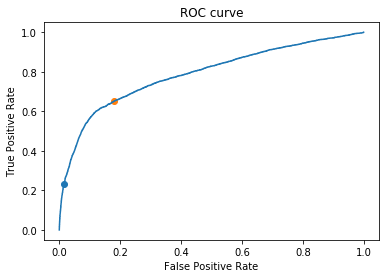

In [177]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_pred_proba))
    
# When threshold = 0.5
false_positives = 452
true_positives = 860
false_positive_rate = false_positives/actual_negative
true_positive_rate = true_positives/actual_positive
plt.scatter(false_positive_rate, true_positive_rate)

# When threshold = 0.1
false_positives = 5267
true_positives = 2418
false_positive_rate = false_positives/actual_negative
true_positive_rate = true_positives/actual_positive
plt.scatter(false_positive_rate, true_positive_rate);

In [0]:
#any part of the curve that is higher than a diagon

In [0]:
#the more the curve goes to the top left, the better the model is doing
# we want false positives to be low and true positives to be high

In [180]:
#putting the roc curve into a dataframe
pd.DataFrame(dict(fpr=fpr, tpr=tpr,thresholds=thresholds))

,fpr,tpr,thresholds
0,0.000000,0.000000,1.903011
1,0.000000,0.000269,0.903011
2,0.000000,0.004849,0.880439
3,0.000034,0.004849,0.879162
4,0.000034,0.008890,0.872156
5,0.000103,0.008890,0.871648
6,0.000103,0.009429,0.870454
7,0.000137,0.009429,0.869912
8,0.000137,0.011584,0.864618
9,0.000171,0.011584,0.864278


# Imbalanced Classes — with synthetic data

## Fun demo!

The next code cell does five things:

#### 1. Generate data

We use scikit-learn's [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to generate fake data for a binary classification problem, based on several parameters, including:
- Number of samples
- Weights, meaning "the proportions of samples assigned to each class."
- Class separation: "Larger values spread out the clusters/classes and make the classification task easier."

(We are generating fake data so it is easy to visualize.)

#### 2. Split data

We split the data three ways, into train, validation, and test sets. (For this toy example, it's not really necessary to do a three-way split. A two-way split, or even no split, would be ok. But I'm trying to demonstrate good habits, even in toy examples, to avoid confusion.)

#### 3. Fit model

We use scikit-learn to fit a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the training data.

We use this model parameter:

> **class_weight : _dict or ‘balanced’, default: None_**

> Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.

> The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`.


#### 4. Evaluate model

We use our Logistic Regression model, which was fit on the training data, to generate predictions for the validation data.

Then we print [scikit-learn's Classification Report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), with many metrics, and also the accuracy score. We are comparing the correct labels to the Logistic Regression's predicted labels, for the validation set. 

#### 5. Visualize decision function

Based on these examples
- https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html
- http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#example-1-decision-regions-in-2d

In [0]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


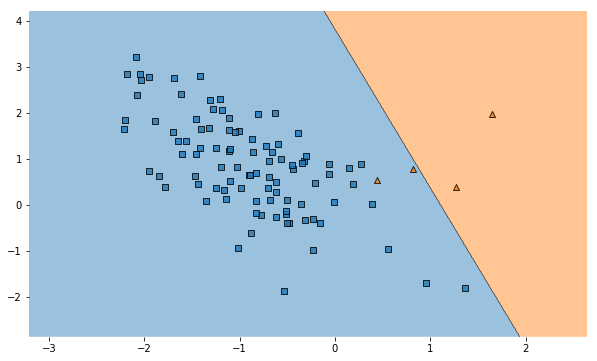

In [182]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)#we are generating data that is 95% one class, 5% another class
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = None
#default parameter for Logistic Regression, we rebalance in next cell

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0);

In [0]:
#orange triangle is positive class
#4 triangles but I only predicted correctly 2 of them. 
#my recall is 2 out of 4 so 50% 
#easier to do classification when balananced 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


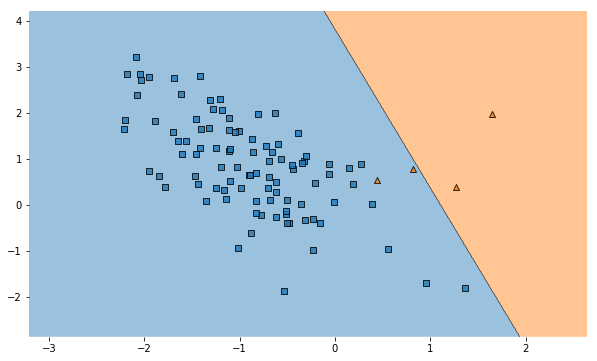

In [184]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)#we are generating data that is 95% one class, 5% another class
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = 'balanaced'
#default parameter for Logistic Regression, we rebalance in next cell

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0);

In [0]:
#convenient way to predict the positive class more often

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html
#automatically adjusts weights inversely proportional to class frequencies in the input data

#in the default case of class_weight = None, an error is weighted equally 
#we might want to priortize classifying positives 
#total error for 4 points, as same as the rest of the 96 points 
#like making new copies for orange triangles, so classes are weighted equally
#default is each obervation is weighted equally, balanced as 

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        96
           1       0.29      1.00      0.44         4

   micro avg       0.90      0.90      0.90       100
   macro avg       0.64      0.95      0.69       100
weighted avg       0.97      0.90      0.93       100

accuracy 0.9


,Predicted Negative,Predicted Positive
Actual Negative,86,10
Actual Positive,0,4


ROC AUC 0.9895833333333334


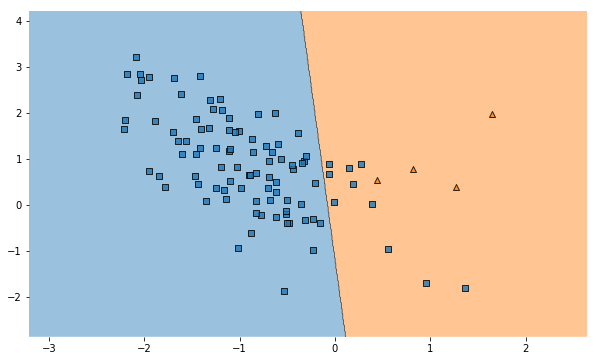

In [190]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)#we are generating data that is 95% one class, 5% another class
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = 'balanced'#{0: 1, 1:10000}means make the positive 10,000 times more weight
#default parameter for Logistic Regression, we rebalance in next cell

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0)

y_pred_proba = model.predict_proba(X_val)[:,1]
print('ROC AUC', roc_auc_score(y_val, y_pred_proba))

In [0]:
# you can try scikit-learn imbalanced-learn ie. smoked
#calculating scores by hand is on sprint
#if you were given the 4 number in confusion matrix, to calculate accuracy and precision

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.93      0.96      0.94        52

   micro avg       0.94      0.94      0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

accuracy 0.94


,Predicted Negative,Predicted Positive
Actual Negative,44,4
Actual Positive,2,50


ROC AUC 0.9671474358974359


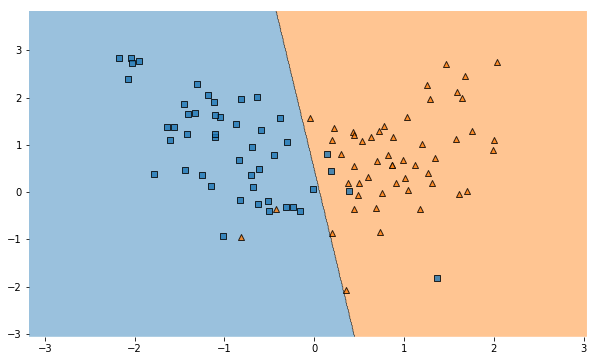

In [192]:
#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.5, 0.5)#we are generating data that is 95% one class, 5% another class
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = None #{0: 1, 1:10000}means make the positive 10,000 times more weight
#default parameter for Logistic Regression, we rebalance in next cell

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0)

y_pred_proba = model.predict_proba(X_val)[:,1]
print('ROC AUC', roc_auc_score(y_val, y_pred_proba))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.50      0.67         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,96,0
Actual Positive,2,2


ROC AUC 0.9973958333333334


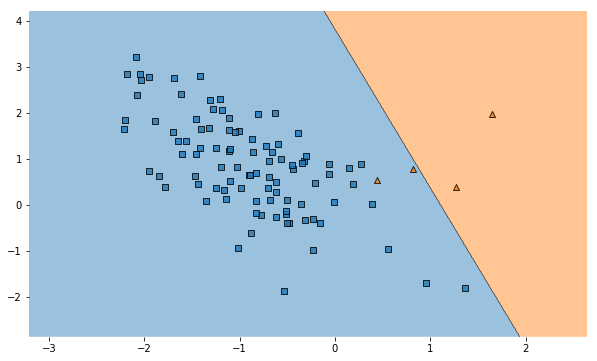

In [193]:
#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)#we are generating data that is 95% one class, 5% another class
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = None #{0: 1, 1:10000}means make the positive 10,000 times more weight
#default parameter for Logistic Regression, we rebalance in next cell

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0)

y_pred_proba = model.predict_proba(X_val)[:,1]
print('ROC AUC', roc_auc_score(y_val, y_pred_proba))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        96
           1       0.29      1.00      0.44         4

   micro avg       0.90      0.90      0.90       100
   macro avg       0.64      0.95      0.69       100
weighted avg       0.97      0.90      0.93       100

accuracy 0.9


,Predicted Negative,Predicted Positive
Actual Negative,86,10
Actual Positive,0,4


ROC AUC 0.9895833333333334


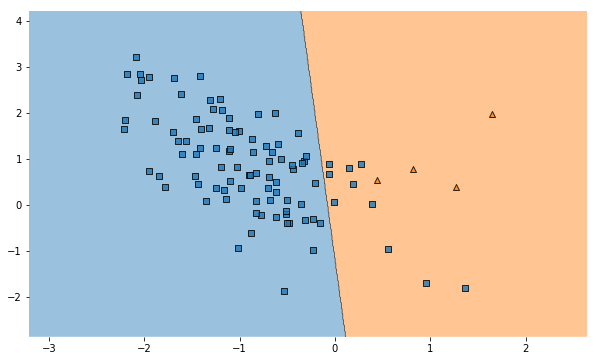

In [194]:
#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)#we are generating data that is 95% one class, 5% another class
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = 'balanced' #{0: 1, 1:10000}means make the positive 10,000 times more weight
#default parameter for Logistic Regression, we rebalance in next cell

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0)

y_pred_proba = model.predict_proba(X_val)[:,1]
print('ROC AUC', roc_auc_score(y_val, y_pred_proba))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        96
           1       0.75      0.75      0.75         4

   micro avg       0.98      0.98      0.98       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.98      0.98      0.98       100

accuracy 0.98


,Predicted Negative,Predicted Positive
Actual Negative,95,1
Actual Positive,1,3


ROC AUC 0.9973958333333334


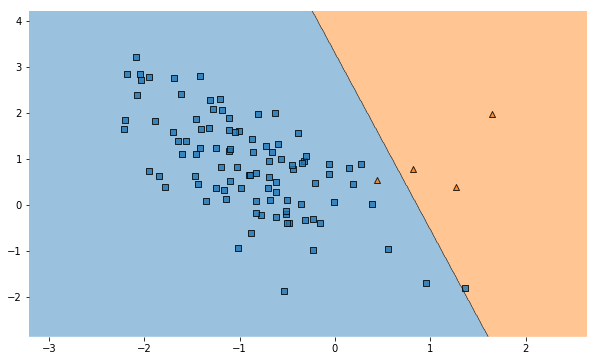

In [195]:
#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)#we are generating data that is 95% one class, 5% another class
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = {0: 1, 1: 2} #{0: 1, 1:10000}means make the positive 10,000 times more weight
#default parameter for Logistic Regression, we rebalance in next cell

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0)

y_pred_proba = model.predict_proba(X_val)[:,1]
print('ROC AUC', roc_auc_score(y_val, y_pred_proba))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        96
           1       0.08      1.00      0.15         4

   micro avg       0.54      0.54      0.54       100
   macro avg       0.54      0.76      0.42       100
weighted avg       0.96      0.54      0.66       100

accuracy 0.54


,Predicted Negative,Predicted Positive
Actual Negative,50,46
Actual Positive,0,4


ROC AUC 0.9739583333333334


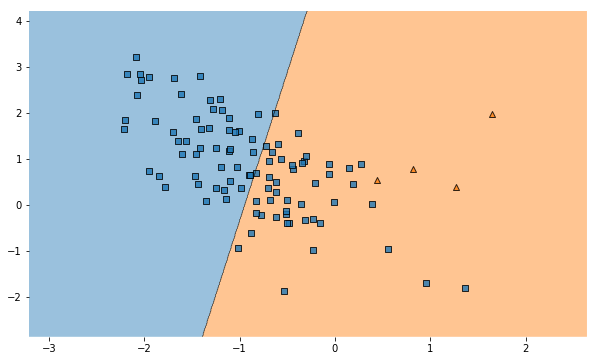

In [196]:
#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)#we are generating data that is 95% one class, 5% another class
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = {0: 1, 1: 100} #{0: 1, 1:10000}means make the positive 10,000 times more weight
#default parameter for Logistic Regression, we rebalance in next cell

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0)

y_pred_proba = model.predict_proba(X_val)[:,1]
print('ROC AUC', roc_auc_score(y_val, y_pred_proba))

              precision    recall  f1-score   support

           0       1.00      0.15      0.25        96
           1       0.05      1.00      0.09         4

   micro avg       0.18      0.18      0.18       100
   macro avg       0.52      0.57      0.17       100
weighted avg       0.96      0.18      0.25       100

accuracy 0.18


,Predicted Negative,Predicted Positive
Actual Negative,14,82
Actual Positive,0,4


ROC AUC 0.9635416666666666


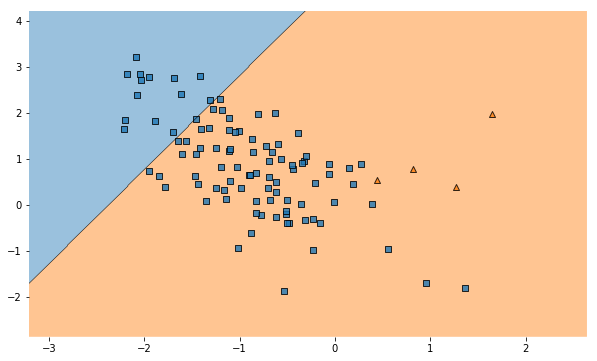

In [197]:
#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)#we are generating data that is 95% one class, 5% another class
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = {0: 1, 1: 10000} #{0: 1, 1:10000}means make the positive 10,000 times more weight
#default parameter for Logistic Regression, we rebalance in next cell

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_val, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0)

y_pred_proba = model.predict_proba(X_val)[:,1]
print('ROC AUC', roc_auc_score(y_val, y_pred_proba))

# usually higher roc auc better f1 score

Try re-running the cell above with different values for these four parameters:
- `n_samples`
- `weights`
- `class_sep`
- `class_balance`

For example, with a 50% / 50% class distribution:
```
n_samples = 1000
weights = (0.50, 0.50)
class_sep = 0.8
class_balance = None
```

With a 95% / 5% class distribution:
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = None
```

With the same 95% / 5% class distribution, but changing the Logistic Regression's `class_balance` parameter to `'balanced'` (instead of its default `None`)
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = 'balanced'
```

With the same 95% / 5% class distribution, but with different values for `class_balance`:
- `{0: 1, 1: 1}` _(equivalent to `None`)_
- `{0: 1, 1: 2}`
- `{0: 1, 1: 10}` _(roughly equivalent to `'balanced'` for this dataset)_
- `{0: 1, 1: 100}`
- `{0: 1, 1: 10000}`

How do the evaluation metrics and decision region plots change?

## What you can do about imbalanced classes

[Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/) gives "a rough outline of useful approaches" : 

- Do nothing. Sometimes you get lucky and nothing needs to be done. You can train on the so-called natural (or stratified) distribution and sometimes it works without need for modification.
- Balance the training set in some way:
  - Oversample the minority class.
  - Undersample the majority class.
  - Synthesize new minority classes.
- Throw away minority examples and switch to an anomaly detection framework.
- At the algorithm level, or after it:
  - Adjust the class weight (misclassification costs).
  - Adjust the decision threshold.
  - Modify an existing algorithm to be more sensitive to rare classes.
- Construct an entirely new algorithm to perform well on imbalanced data.


#### We demonstrated two of these options: 

- "Adjust the class weight (misclassification costs)" — many scikit-learn classifiers have a `class_balance` parameter
- "Adjust the decision threshold" — you can lean more about this in a great blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).

#### Another option to be aware of:
- The [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library can be used to "oversample the minority class, undersample the majority class, or synthesize new minority classes."

# ASSIGNMENT

#### Bank Marketing
- Try the `class_weight` parameter.
- Explore and visualize your data. 
- Wrangle [bad data](https://github.com/Quartz/bad-data-guide), outliers, and missing values.
- Try engineering more features. You can transform, bin, and combine features. 
- Try selecting fewer features.
-Try class weight roc_auc


#### Imbalanced Classes demo with synthetic data
- Play around with the demo. Change parameter values.
- Be able to calculate precision, recall, F1, and accuracy "by hand", given a confusion matrix and access to Wikipedia.

# STRETCH
- Read the blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415). You can replicate the code as-is,  ["the hard way"](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit). Or you can apply it to the Bank Marketing dataset.
- Try the [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library.
- Try other [scikit-learn classifiers](https://scikit-learn.org/stable/supervised_learning.html), beyond Logistic Regression.

In [0]:
# Values are missing
# Zeros replace missing values
# Spelling is inconsistent
# Units are not specified
# Categories are badly chosen
# Field names are ambiguous
# Spreadsheet has 65536 rows, 255 columns being trunkated excel data
# Spreadsheet has dates in 1900, 1904, 1969, or 1970

In [199]:
bank.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [200]:
bank.select_dtypes(exclude='number').nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [201]:
bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [202]:
bank['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [0]:
import category_encoders as ce

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True))

In [204]:
pipeline

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=None, drop_invariant=False, handle_missing='value',
       handle_unknown='value', return_df=True, use_cat_names=True,
       verbose=0))])

In [205]:
bank.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [206]:
from numpy import array
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']


In [207]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = bank['job']

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)


# onehot_encoder = OneHotEncoder(sparse=False)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)

# X_enc = pd.get_dummies(X_enc, columns=['sex','region','smoker'])
# mergedata = mergedata.drop(['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],axis=1)

# X_enc = pd.get_dummies(X_enc, columns=['sex','region','smoker'])

# inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# print(inverted)

[ 3  7  7  0  7  7  0  1  9  7  1  7  1  3  1  5  1  1  1  4 10  1  5  9
  0  9  9  6  9 11  0  9  1  4  1 11  7  9  0  9  4  2  0  0  0  9  0  1
  0  1  0  3  0  0  1  9  4  7 10  9  2  1  1  1  0  0  1  0  0  1  4  4
  0 11  0  1  9  7  4  1  1  1  0  2  9  0  4  0  9  0  0 11  0 10  1  7
  4  0  9  1  7  1  7  0  0  7  3  0  2  9  5 10  7  1  4  1  0  1  0  1
  1  1  7  9  0  0  0  9  5  9  1  9  1  1  4  4  3  1  7  1 10  4  4  1
 11  1  1  0  0  1  1  2  7  2  1  1  1  1  9  7  4  1  1  1  7  2  7  0
  1  4  1  7  9  0  7  4  7  0  7  1  9  1  1  0  1  4  9  5  1  0  9  1
  4  9  1  1  0  1  0  1  7  7  1  0  1  8  8 10  7  8  8  3  0  5  1  3
  1  1  3  7  0  9  7  9  9  5  9  0  5  1  0  7  4  0  6  0  1  0  7  4
  5  9  4  7  9  7  9  9  1  7  9  1  7  9  7  7  1  4  9  0  0  1  9  0
  0  1  6  8  4  6 10  4  3  0  3  1  7  1  9  5  1  9  0  1  1  1  3  0
  1  7  4  0  9  1  9  6  1  0  7 11  7  1  5 11  0  0  1  3  0  1  4  0
  0  1  4  0  0  5  1  7  4  0  9  7  9  3  0  0  1

In [208]:
len(integer_encoded), bank.shape

(41188, (41188, 21))

In [209]:
bank.shape

(41188, 21)

In [210]:
bank['job_label'] = integer_encoded
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_label
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7


In [0]:
def make_features(X):
  get2darray = np.array([])
  for i in X:
    values = bank[i]

    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    get2darray = np.append(get2darray, [integer_encoded], axis=0)
  return(get2darray)# you need to return it, print returns a nonetype

In [212]:


X =  ['marital','education']

twodimensionalarray = make_features(X)

ValueError: ignored

In [156]:
twodimensionalarray.shape

(82376,)

In [144]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

twodimensionalarray

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2,

In [131]:
# X =  ['marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# make_features(X)

values = bank['marital']

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[1 1 1 ... 1 1 1]


In [132]:
import numpy as np

twodimensionalarray = make_features(X)

[1 1 1 ... 1 1 1]
[0 3 3 ... 6 5 5]
[0 1 0 ... 0 0 0]
[0 0 2 ... 2 0 2]
[0 0 0 ... 0 0 0]
[1 1 1 ... 0 0 0]
[6 6 6 ... 7 7 7]
[1 1 1 ... 0 0 0]
[1 1 1 ... 1 1 0]


In [0]:
twodimensionalarray

In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
      
MultiColumnLabelEncoder(columns = ['marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']).fit_transform(bank)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_label
0,56,housemaid,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,3
1,57,services,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,7
2,37,services,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,7
3,40,admin.,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,7
5,45,services,1,2,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,7
6,59,admin.,1,5,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
7,41,blue-collar,1,7,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,1
8,24,technician,2,5,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,9
9,25,services,2,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,7
